#**RECURRENT NEURAL NETWORK (RNN)**

 - processes sequential data, such as words, sentences, or time-series data, to produce a sequential output



Application of RNN in Time series data:

  - Solar flare activity prediction


**Function: get_train_test**
 - This function reads time series data from a CSV file, scales it to the range [0, 1], and splits it into training and testing datasets.

--------------------------------------------------------------------------
**Function: get_XY**
 - This function prepares input features (X) and target labels (Y) for training an RNN based on specified time steps.

--------------------------------------------------------------------------
**Function: create_RNN**
 - This function creates and compiles a simple RNN model using Keras.

--------------------------------------------------------------------------
**Function: print_error**
 - This function calculates and prints the Root Mean Squared Error (RMSE) for both training and testing predictions.

--------------------------------------------------------------------------
**Function: plot_result**
 - This function visualizes the actual vs. predicted values over time.

--------------------------------------------------------------------------

In [1]:
# Parameter split_percent defines the ratio of training examples
def get_train_test(url, split_percent=0.8):
    df = read_csv(url, usecols=[1], engine='python')
    data = np.array(df.values.astype('float32'))
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data).flatten()
    n = len(data)
    # Point for splitting data into train and test
    split = int(n*split_percent)
    train_data = data[range(split)]
    test_data = data[split:]
    return train_data, test_data, data

# Prepare the input X and target Y
def get_XY(dat, time_steps):
    Y_ind = np.arange(time_steps, len(dat), time_steps)
    Y = dat[Y_ind]
    rows_x = len(Y)
    X = dat[range(time_steps*rows_x)]
    X = np.reshape(X, (rows_x, time_steps, 1))
    return X, Y

def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

def print_error(trainY, testY, train_predict, test_predict):
    # Error of predictions
    train_rmse = math.sqrt(mean_squared_error(trainY, train_predict))
    test_rmse = math.sqrt(mean_squared_error(testY, test_predict))
    # Print RMSE
    print('Train RMSE: %.3f RMSE' % (train_rmse))
    print('Test RMSE: %.3f RMSE' % (test_rmse))

# Plot the result
def plot_result(trainY, testY, train_predict, test_predict):
    actual = np.append(trainY, testY)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(15, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(trainY), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Sunspots scaled')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')



Importing the necessary libraries

In [2]:
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN                                       #Regression problem with continuous features
from sklearn.preprocessing import MinMaxScaler                                  #scikit-learn
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt


Load and split the data into train set and test set

In [3]:
sunspots_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv'                         #loading the solar flares dataset
time_steps = 12

train_data, test_data, data = get_train_test(sunspots_url)
trainX, trainY = get_XY(train_data, time_steps)
testX, testY = get_XY(test_data, time_steps)


Build and Train the RNN model



In [4]:
model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1),
                   activation=['tanh', 'tanh'])                                 #create the model

model.fit(trainX, trainY, epochs=20, batch_size=5, verbose=2)                   #train the model



Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 - 2s - 43ms/step - loss: 0.0213
Epoch 2/20
38/38 - 0s - 3ms/step - loss: 0.0154
Epoch 3/20
38/38 - 0s - 4ms/step - loss: 0.0123
Epoch 4/20
38/38 - 0s - 3ms/step - loss: 0.0105
Epoch 5/20
38/38 - 0s - 3ms/step - loss: 0.0091
Epoch 6/20
38/38 - 0s - 3ms/step - loss: 0.0082
Epoch 7/20
38/38 - 0s - 3ms/step - loss: 0.0075
Epoch 8/20
38/38 - 0s - 3ms/step - loss: 0.0069
Epoch 9/20
38/38 - 0s - 3ms/step - loss: 0.0064
Epoch 10/20
38/38 - 0s - 3ms/step - loss: 0.0062
Epoch 11/20
38/38 - 0s - 4ms/step - loss: 0.0059
Epoch 12/20
38/38 - 0s - 4ms/step - loss: 0.0056
Epoch 13/20
38/38 - 0s - 4ms/step - loss: 0.0055
Epoch 14/20
38/38 - 0s - 3ms/step - loss: 0.0053
Epoch 15/20
38/38 - 0s - 3ms/step - loss: 0.0052
Epoch 16/20
38/38 - 0s - 3ms/step - loss: 0.0051
Epoch 17/20
38/38 - 0s - 4ms/step - loss: 0.0050
Epoch 18/20
38/38 - 0s - 4ms/step - loss: 0.0049
Epoch 19/20
38/38 - 0s - 4ms/step - loss: 0.0048
Epoch 20/20
38/38 - 0s - 3ms/step - loss: 0.0048


In [7]:
model.save('sunspots.keras')                                                    #save the model

Make predictions on training and testing datasets

In [8]:
import tensorflow as tf
retrieved_model = tf.keras.models.load_model('sunspots.keras')
train_predict = model.predict(trainX)
test_predict = retrieved_model.predict(testX)

print_error(trainY, testY, train_predict, test_predict)                         # Print the prediction error



1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
Train RMSE: 0.069 RMSE
Test RMSE: 0.093 RMSE


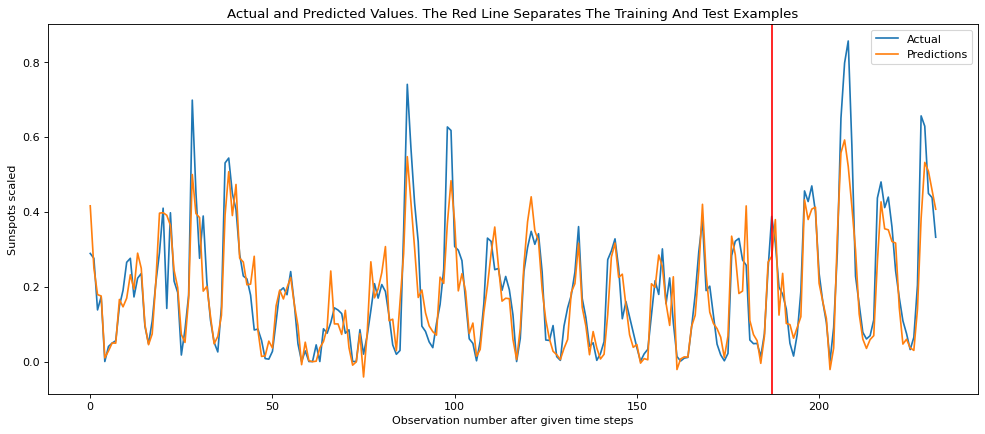

In [9]:
plot_result(trainY, testY, train_predict, test_predict)                         #Plot result